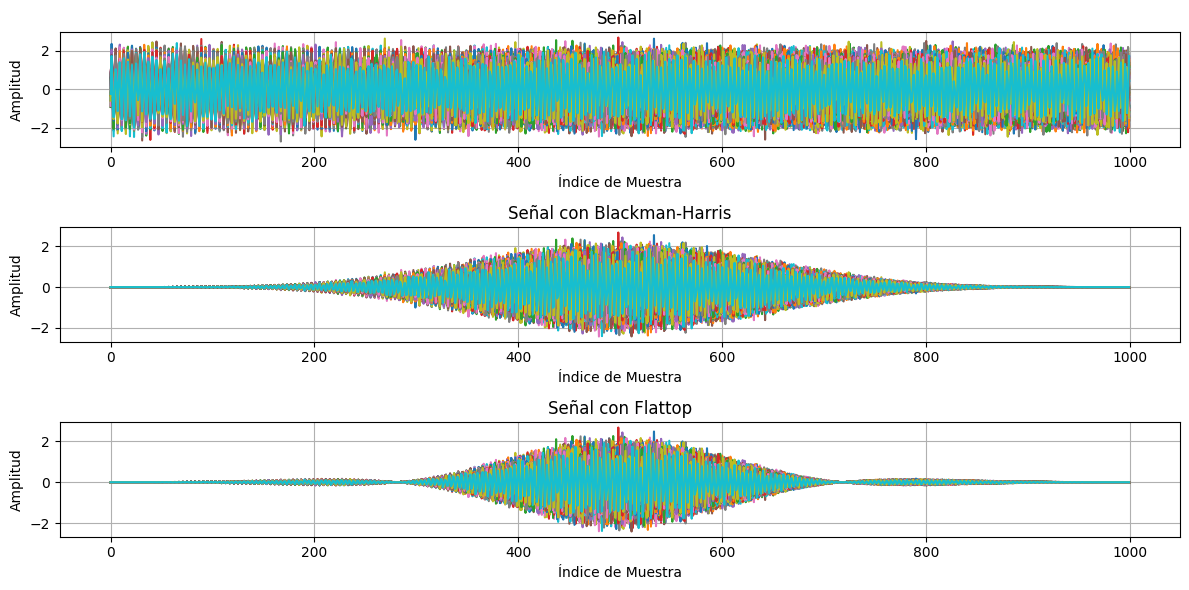

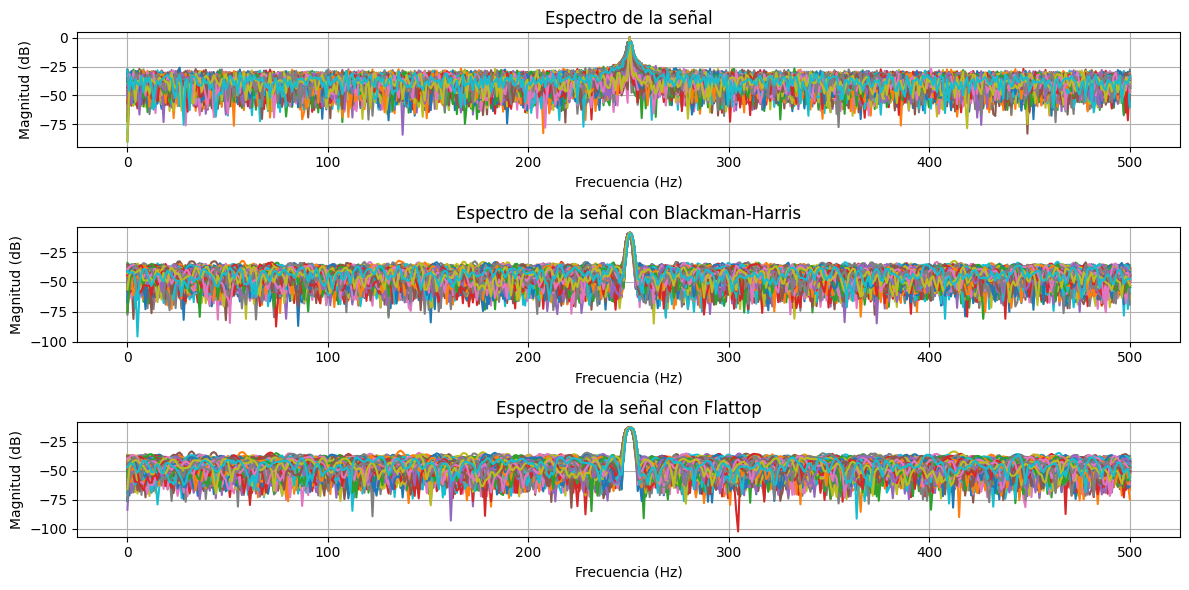

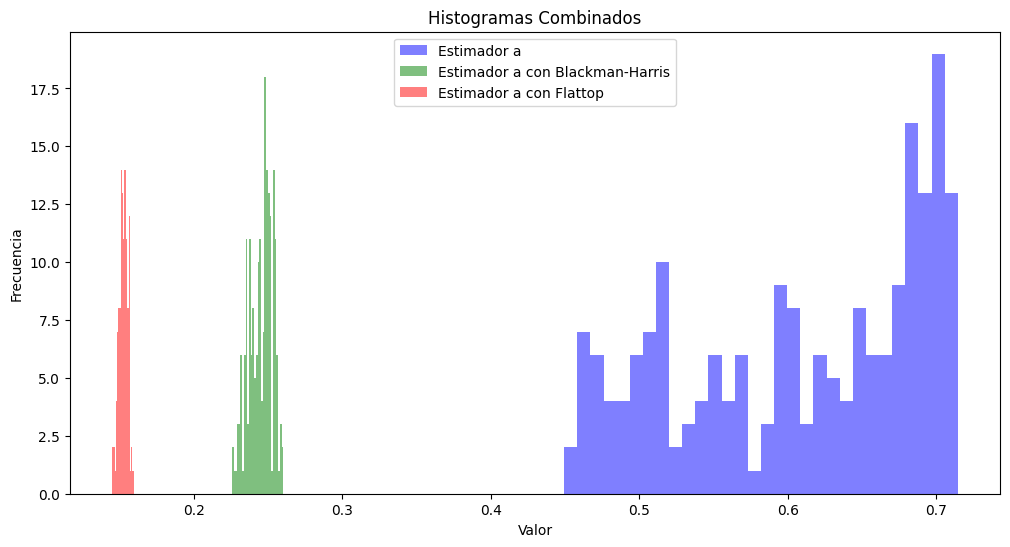

In [29]:
#flattop blackmanHarris son las dos ventanas que si o si tenemos que usar

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import blackmanharris, flattop

numero_de_pruebas = 200
SNR = 10  # dB
N = 1000  # número de muestras
fs = 1000  # frecuencia de muestreo en Hz
df = fs / N  # resolución espectral en Hz
a1 = np.sqrt(2)  # Amplitud de la señal
pot_ruido = 10 ** (-SNR / 10)  # Potencia del ruido

n = np.arange(N).reshape(-1, 1)  # (N, 1)

f0 = fs / 4  # frecuencia central en Hz
fr = np.random.uniform(-0.5, 0.5, (1, numero_de_pruebas))
f1 = f0 + fr * df  # (1, P)

nn = np.random.normal(0, np.sqrt(pot_ruido), (N, numero_de_pruebas))
pruebas = (a1 * np.sin(2 * np.pi * f1 * n / fs) + nn)  # (N, P)

# Aplicar la ventana de Blackman-Harris
ventana_bh = blackmanharris(N)
pruebas_vent_bh = pruebas * ventana_bh[:, np.newaxis]
ventana_ft = flattop(N)
pruebas_vent_ft = pruebas * ventana_ft[:, np.newaxis]


# === Gráfico de señales temporales ===
plt.figure(1,figsize=(12, 6))

#PRUEBA

plt.subplot(3, 1, 1)
plt.plot(n, pruebas[:, :numero_de_pruebas])  # graficamos las primeras 5 columnas
plt.title('Señal')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)
#plt.legend([f'Prueba {i+1}' for i in range(numero_de_pruebas)])


#VENTANA BH
plt.subplot(3, 1, 2)
plt.plot(n, pruebas_vent_bh[:, :numero_de_pruebas])  # graficamos las primeras 5 columnas
plt.title('Señal con Blackman-Harris')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)
#plt.legend([f'Prueba {i+1}' for i in range(numero_de_pruebas)])




#VENTANA FT
plt.subplot(3, 1, 3)
plt.plot(n, pruebas_vent_ft[:, :numero_de_pruebas])  # graficamos las primeras 5 columnas
plt.title('Señal con Flattop')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)
#plt.legend([f'Prueba {i+1}' for i in range(numero_de_pruebas)])

plt.tight_layout()
#plt.show(block=False)

# === Gráfico del espectro ===

# Plot
plt.figure(2,figsize=(12, 6))
# Eje de frecuencias hasta Nyquist (fs/2)
ff = np.linspace(0, fs/2, N//2)

# FFT → columnas: pruebas
ft_S = np.fft.fft(pruebas[:, :numero_de_pruebas], axis=0)/N
# Calcular potencia (escala lineal)
pot = 2 * np.abs(ft_S[:N//2, :])**2  # tomamos sólo hasta fs/2
pot_dB = 10 * np.log10(pot)

plt.subplot(3, 1, 1)
plt.plot(ff, pot_dB)
plt.title('Espectro de la señal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)
#plt.legend([f'Prueba {i+1}' for i in range(numero_de_pruebas)])



# FFT → columnas: pruebas
ft_S_bh = np.fft.fft(pruebas_vent_bh[:, :numero_de_pruebas], axis=0)/N

# Calcular potencia (escala lineal)
pot_bh = 2 * np.abs(ft_S_bh[:N//2, :])**2  # tomamos sólo hasta fs/2
pot_dB_bh = 10 * np.log10(pot_bh)

# Plot
plt.subplot(3, 1, 2)
plt.plot(ff, pot_dB_bh)
plt.title('Espectro de la señal con Blackman-Harris')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)
#plt.legend([f'Prueba {i+1}' for i in range(numero_de_pruebas)])




# FFT → columnas: pruebas
ft_S_ft = np.fft.fft(pruebas_vent_ft[:, :numero_de_pruebas], axis=0)/N

# Calcular potencia (escala lineal)
pot_ft = 2 * np.abs(ft_S_ft[:N//2, :])**2  # tomamos sólo hasta fs/2
pot_dB_ft = 10 * np.log10(pot_ft)

# Plot
plt.subplot(3, 1, 3)
plt.plot(ff, pot_dB_ft)
plt.title('Espectro de la señal con Flattop')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)
#plt.legend([f'Prueba {i+1}' for i in range(numero_de_pruebas)])


plt.tight_layout()


plt.figure(3,figsize=(12, 6))
##Estimacion de la amplitud

abs_ft= np.abs(ft_S)  # Calcula el valor absoluto de la fila
abs_ft_bh= np.abs(ft_S_bh)  # Calcula el valor absoluto de la fila
abs_ft_ft= np.abs(ft_S_ft)  # Calcula el valor absoluto de la fila

a_est = np.abs(ft_S[round(f0)] )  # Calcula el valor absoluto de la fila

a_est_bh = np.abs(ft_S_bh[round(f0)])  # Calcula el valor absoluto de la fila

a_est_ft = np.abs(ft_S_ft[round(f0)] )  # Calcula el valor absoluto de la fila

# Crear el histograma combinado

plt.hist(a_est, bins=30, alpha=0.5, label='Estimador a', color='blue')
plt.hist(a_est_bh, bins=30, alpha=0.5, label='Estimador a con Blackman-Harris', color='green')
plt.hist(a_est_ft, bins=30, alpha=0.5, label='Estimador a con Flattop', color='red')
plt.title('Histogramas Combinados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()




plt.show()

# Cálculo del sesgo
desvio = np.std(a_est)
desvio_bh = np.std(a_est_bh)
desvio_ft = np.std(a_est_ft)


sesgo = np.mean(a_est) - a1
sesgo_bh = np.mean(a_est_bh) - a1
sesgo_ft = np.mean(a_est_ft) - a1



